# Подготовка данных

In [1]:
import numpy as np

* Получить датасет Ирис

Загрузка датасета, преобразование лейблов в числа, приведение всех элементов к плавающей точке



In [2]:
data = np.genfromtxt('iris_data.csv', delimiter=',', dtype=str)

label_to_int = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
int_to_label = {value: key for key, value in label_to_int.items()}
data[:, 4] = [label_to_int[val] for val in data[:, 4]]

data = data.astype(float)
data[:10]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ]])

* Представить датасет одномерный/двумерный массивы (признаки поместить в матрицу (n, 4), названия самого ириса --- вектор размера n). Отобразите сколько места он занимает.

Разделение на инпуты и таргеты, отображение занимаемого места

In [3]:
X, Y = np.hsplit(data, [4])
X.nbytes, Y.nbytes

(4800, 1200)

* Нормализуйте данные на промежуток от 0 до 1 для каждой колонки

Нормализация на [0, 1] для каждой отдельной колонки

In [4]:
for i in range(X.shape[1]):
  X[:,i] = (X[:,i]-np.min(X[:,i]))/(np.max(X[:,i])-np.min(X[:,i]))
X[:10]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])

* Представьте один из признаков в виде категориальной переменной и её на три типа используя квантили:

[] < 0.25 --- small

[] 0.25-0.75 --- medium

[] \> 0.75 --- big

Преобразую первый столбец в категории: 0 - small, 1 - medium, 2 - big


In [5]:
for i in range(X.shape[0]):
  if X[i,0] < 0.25:
    X[i,0] = 0
  elif X[i,0] <= 0.75:
    X[i,0] = 1
  else:
    X[i,0] = 2
X[:10]

array([[0.        , 0.625     , 0.06779661, 0.04166667],
       [0.        , 0.41666667, 0.06779661, 0.04166667],
       [0.        , 0.5       , 0.05084746, 0.04166667],
       [0.        , 0.45833333, 0.08474576, 0.04166667],
       [0.        , 0.66666667, 0.06779661, 0.04166667],
       [1.        , 0.79166667, 0.11864407, 0.125     ],
       [0.        , 0.58333333, 0.06779661, 0.08333333],
       [0.        , 0.58333333, 0.08474576, 0.04166667],
       [0.        , 0.375     , 0.06779661, 0.04166667],
       [0.        , 0.45833333, 0.08474576, 0.        ]])

* Разделите датасет на две случайные выборки (0.8 / 0.2)

Реализую кастомную функцию разделения

In [6]:
def custom_train_test_split(inputs, targets, test_size=0.2, random_state=42):
    np.random.seed(random_state)

    indices = np.arange(len(inputs))
    np.random.shuffle(indices)

    test_size = int(len(inputs) * test_size)
    train_size = len(inputs) - test_size

    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    X_train, X_test = inputs[train_indices], inputs[test_indices]
    y_train, y_test = targets[train_indices], targets[test_indices]

    return X_train, X_test, y_train, y_test


Делю данные

In [7]:
X_train, X_test, Y_train, Y_test = custom_train_test_split(X, Y, test_size=0.2)
X_test

array([[1.        , 0.41666667, 0.61016949, 0.54166667],
       [0.        , 0.125     , 0.05084746, 0.08333333],
       [1.        , 0.375     , 0.61016949, 0.5       ],
       [1.        , 0.25      , 0.57627119, 0.45833333],
       [1.        , 0.70833333, 0.08474576, 0.04166667],
       [1.        , 0.41666667, 0.52542373, 0.5       ],
       [2.        , 0.375     , 0.89830508, 0.70833333],
       [1.        , 0.54166667, 0.79661017, 0.83333333],
       [0.        , 0.70833333, 0.08474576, 0.125     ],
       [0.        , 0.16666667, 0.38983051, 0.375     ],
       [1.        , 0.54166667, 0.79661017, 1.        ],
       [2.        , 0.41666667, 0.81355932, 0.625     ],
       [0.        , 0.45833333, 0.08474576, 0.        ],
       [1.        , 0.45833333, 0.77966102, 0.95833333],
       [0.        , 0.41666667, 0.06779661, 0.04166667],
       [1.        , 0.45833333, 0.66101695, 0.58333333],
       [2.        , 0.33333333, 0.86440678, 0.75      ],
       [1.        , 0.375     ,

# Дообучение

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

В качестве классификатора выбрал случайный лес, в качестве метрик - Accuracy, Precision, Recall, F1-score

In [9]:
clf = RandomForestClassifier(n_estimators=5, random_state=42)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}")

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1: 0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Глядя на значения метрик, можно сказать, что модель хорошо подошла для решения задачи, так как все значения выбранных метрик достаточно высоки

# Эксперименты

* Проведите три эксперимента изменяя гиперпараметры модели или условия препроцессинга данных (например, нормализованные или нет данные), сделайте выводы

В качестве экспериментов решил менять гиперпараметры и смотреть на результаты модели.

Первый гиперпараметр - число деревьев. Исследуются значения в диспазоне [1, 50]. Для оценки взял кросс-валидацию, итоговая оценка - среднее значение 5 фолдеров. Результаты отобразил на графике

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

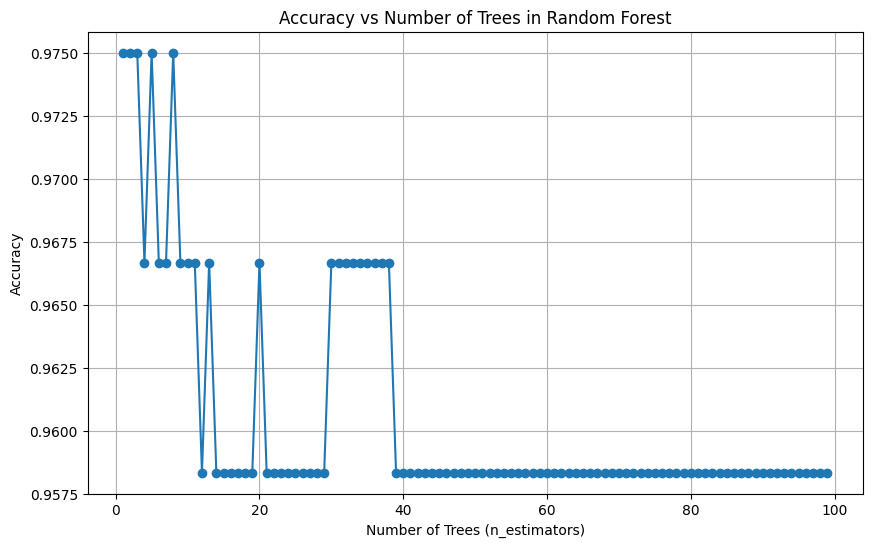

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

results = []

for n_estimators in range(1, 100):
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    results.append({'n_estimators': n_estimators, 'accuracy': mean_score})

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(results_df['n_estimators'], results_df['accuracy'], marker='o')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Видно, что наивысшие значения метрик наблюдаются при достаточно малых значениях - от 1 до 6. Далее метрика падает, поднимаясь лишь на небольшом диапазоне в 30-38 деревьев.

Второй гиперпараметр - максимальная глубина деревьев. Исследуются значения в диспазоне [1, 20]. Для оценки взял кросс-валидацию, итоговая оценка - среднее значение 5 фолдеров. Результаты отобразил на графике

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

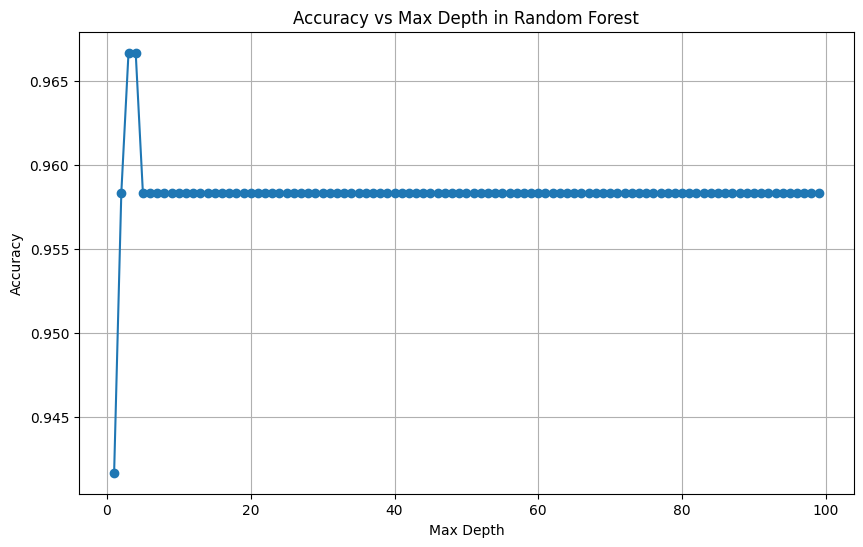

In [11]:
results_depth = []

for max_depth in range(1, 100):
    clf = RandomForestClassifier(max_depth=max_depth, random_state=42)

    scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    results_depth.append({'max_depth': max_depth, 'accuracy': mean_score})

results_depth_df = pd.DataFrame(results_depth)

plt.figure(figsize=(10, 6))
plt.plot(results_depth_df['max_depth'], results_depth_df['accuracy'], marker='o')
plt.title('Accuracy vs Max Depth in Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Пиковое значение точности - при глубине дерева 4/5, далее точность ниже.

Третий гиперпараметр - минимальное число образцов для разделения узла. Исследуются значения в диспазоне [2, 50]. Для оценки взял кросс-валидацию, итоговая оценка - среднее значение 5 фолдеров. Результаты отобразил на графике

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

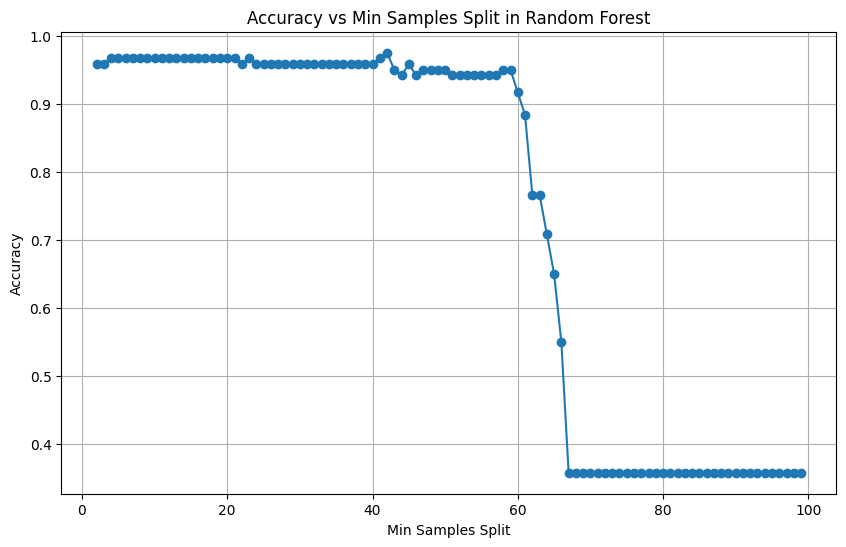

In [12]:
results_split = []

for min_samples_split in range(2, 100):
    clf = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)

    scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    results_split.append({'min_samples_split': min_samples_split, 'accuracy': mean_score})

results_split_df = pd.DataFrame(results_split)

plt.figure(figsize=(10, 6))
plt.plot(results_split_df['min_samples_split'], results_split_df['accuracy'], marker='o')
plt.title('Accuracy vs Min Samples Split in Random Forest')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Наиболее высокие результаты - при минимальных значениях сплита от 3 до 23, после чего метрика слегка падает до значения в 60. Начиная со значения 60 точность резко падает до 0.35.

Вывод: при выборе гиперпараметров важно учитывать баланс между переобучением и недообучением, а также вычислительные затраты. Ключевой подход — проводить эксперименты с кросс-валидацией, чтобы выбрать гиперпараметры, оптимально подходящие для данных на конкретной задаче.

* Пользуясь методами уменьшения размерности (PCA, t-sne) визуализируйте датасет. Это должен быть scatter plot, где точка это отдельный ирис, ее координаты -- признаки со сжатой выбранной вам размерностью, а цвет -- тип ириса. Нарисуйте этот график дважды, где

  []Тип ириса выбирается из оригинальных данных

  []Тип ириса выбирается из предсказанных данных


Воспользуемся и PCA и t-sne для визуализации. Так как нужно также вывести предсказанные данные, то еще раз запускаю классификацию на гиперпараметрах, полученных из экспериментов выше. После чего уменьшаю размерность до 2 кажждым из методов и строю графики на истинных данных и предсказанных

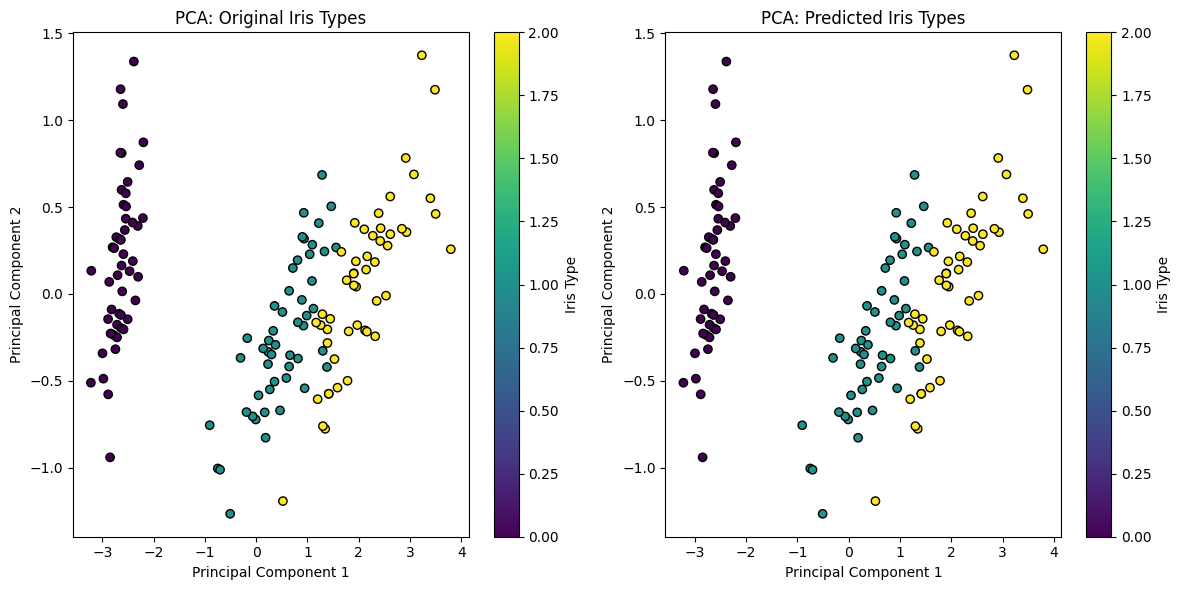

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf = RandomForestClassifier(n_estimators=4, max_depth=4, min_samples_split=5, random_state=42)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("PCA: Original Iris Types")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Iris Type')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("PCA: Predicted Iris Types")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Iris Type')

plt.tight_layout()
plt.show()


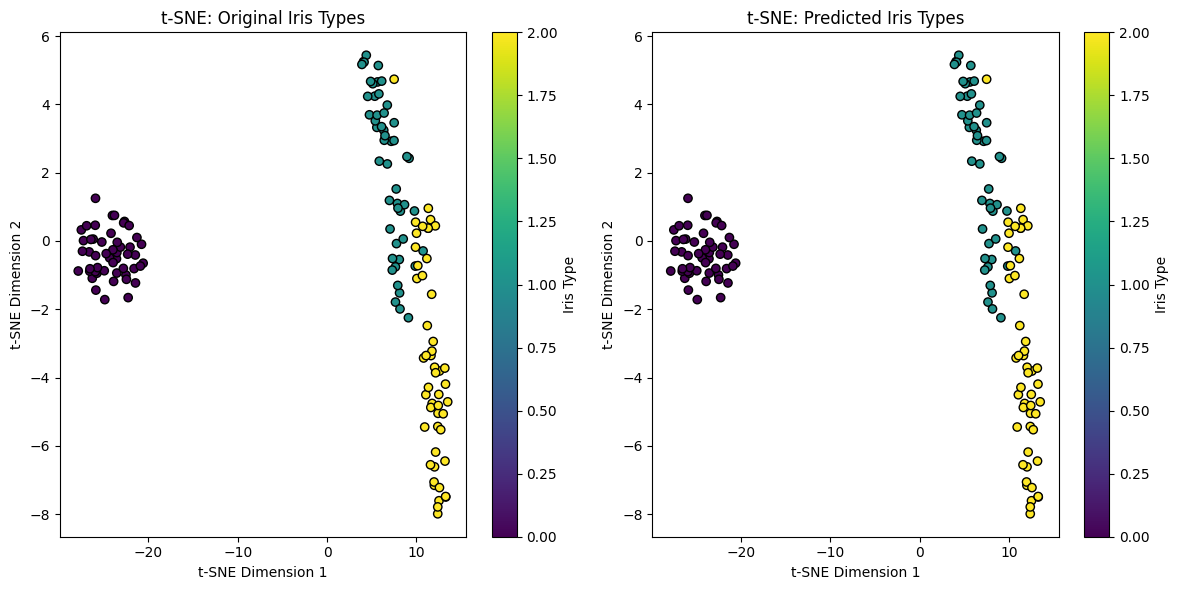

In [14]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("t-SNE: Original Iris Types")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='Iris Type')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("t-SNE: Predicted Iris Types")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='Iris Type')

plt.tight_layout()
plt.show()
